
----

# Purpose

Can we use numpy arrays for a game grid and then vectorised calculations for fast computation?

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

In [3]:
#  player in pixels position for calculations later on
player_rect_x = 555
player_rect_y = 356

# Grid Creaton

Let's define the maximum size of the x (width) and y (width) of our grid.

In [4]:
x_max = 30
y_max = 30

np.indices achieves the same 
~~as you'll see below using `np.mgrid` we get two arrays which we can use to create x,y pairs that describe the grid.~~

In [5]:
#y_mesh, x_mesh = np.mgrid[0:y_max, 0:x_max]
y_mesh, x_mesh = np.indices((y_max, x_max))
print(x_mesh)
print("")
print(y_mesh)

[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 

however we're drawing in pixels, assuming a fixed square pixel size per grid we'll call `tile_size`

In [6]:
tile_size = 64.0
tile_center = (tile_size / 2.0)

However 0 is going to be a problem for us, when calculating pixel distances so lets bump every up by 1.

Additionally we want to have the center value, so take the tile size and halve it.

In [7]:
x_mesh = (x_mesh +1) * tile_center
print(x_mesh)

[[  32.   64.   96.  128.  160.  192.  224.  256.  288.  320.  352.  384.
   416.  448.  480.  512.  544.  576.  608.  640.  672.  704.  736.  768.
   800.  832.  864.  896.  928.  960.]
 [  32.   64.   96.  128.  160.  192.  224.  256.  288.  320.  352.  384.
   416.  448.  480.  512.  544.  576.  608.  640.  672.  704.  736.  768.
   800.  832.  864.  896.  928.  960.]
 [  32.   64.   96.  128.  160.  192.  224.  256.  288.  320.  352.  384.
   416.  448.  480.  512.  544.  576.  608.  640.  672.  704.  736.  768.
   800.  832.  864.  896.  928.  960.]
 [  32.   64.   96.  128.  160.  192.  224.  256.  288.  320.  352.  384.
   416.  448.  480.  512.  544.  576.  608.  640.  672.  704.  736.  768.
   800.  832.  864.  896.  928.  960.]
 [  32.   64.   96.  128.  160.  192.  224.  256.  288.  320.  352.  384.
   416.  448.  480.  512.  544.  576.  608.  640.  672.  704.  736.  768.
   800.  832.  864.  896.  928.  960.]
 [  32.   64.   96.  128.  160.  192.  224.  256.  288.  320.  35

In [8]:
y_mesh = (y_mesh +1) * tile_center
print(y_mesh)

[[  32.   32.   32.   32.   32.   32.   32.   32.   32.   32.   32.   32.
    32.   32.   32.   32.   32.   32.   32.   32.   32.   32.   32.   32.
    32.   32.   32.   32.   32.   32.]
 [  64.   64.   64.   64.   64.   64.   64.   64.   64.   64.   64.   64.
    64.   64.   64.   64.   64.   64.   64.   64.   64.   64.   64.   64.
    64.   64.   64.   64.   64.   64.]
 [  96.   96.   96.   96.   96.   96.   96.   96.   96.   96.   96.   96.
    96.   96.   96.   96.   96.   96.   96.   96.   96.   96.   96.   96.
    96.   96.   96.   96.   96.   96.]
 [ 128.  128.  128.  128.  128.  128.  128.  128.  128.  128.  128.  128.
   128.  128.  128.  128.  128.  128.  128.  128.  128.  128.  128.  128.
   128.  128.  128.  128.  128.  128.]
 [ 160.  160.  160.  160.  160.  160.  160.  160.  160.  160.  160.  160.
   160.  160.  160.  160.  160.  160.  160.  160.  160.  160.  160.  160.
   160.  160.  160.  160.  160.  160.]
 [ 192.  192.  192.  192.  192.  192.  192.  192.  192.  192.  19

If we want to get the individual items use the `ravel` function.

In [9]:
x_mesh.ravel()

array([  32.,   64.,   96.,  128.,  160.,  192.,  224.,  256.,  288.,
        320.,  352.,  384.,  416.,  448.,  480.,  512.,  544.,  576.,
        608.,  640.,  672.,  704.,  736.,  768.,  800.,  832.,  864.,
        896.,  928.,  960.,   32.,   64.,   96.,  128.,  160.,  192.,
        224.,  256.,  288.,  320.,  352.,  384.,  416.,  448.,  480.,
        512.,  544.,  576.,  608.,  640.,  672.,  704.,  736.,  768.,
        800.,  832.,  864.,  896.,  928.,  960.,   32.,   64.,   96.,
        128.,  160.,  192.,  224.,  256.,  288.,  320.,  352.,  384.,
        416.,  448.,  480.,  512.,  544.,  576.,  608.,  640.,  672.,
        704.,  736.,  768.,  800.,  832.,  864.,  896.,  928.,  960.,
         32.,   64.,   96.,  128.,  160.,  192.,  224.,  256.,  288.,
        320.,  352.,  384.,  416.,  448.,  480.,  512.,  544.,  576.,
        608.,  640.,  672.,  704.,  736.,  768.,  800.,  832.,  864.,
        896.,  928.,  960.,   32.,   64.,   96.,  128.,  160.,  192.,
        224.,  256.,

In [10]:
y_mesh.ravel()

array([  32.,   32.,   32.,   32.,   32.,   32.,   32.,   32.,   32.,
         32.,   32.,   32.,   32.,   32.,   32.,   32.,   32.,   32.,
         32.,   32.,   32.,   32.,   32.,   32.,   32.,   32.,   32.,
         32.,   32.,   32.,   64.,   64.,   64.,   64.,   64.,   64.,
         64.,   64.,   64.,   64.,   64.,   64.,   64.,   64.,   64.,
         64.,   64.,   64.,   64.,   64.,   64.,   64.,   64.,   64.,
         64.,   64.,   64.,   64.,   64.,   64.,   96.,   96.,   96.,
         96.,   96.,   96.,   96.,   96.,   96.,   96.,   96.,   96.,
         96.,   96.,   96.,   96.,   96.,   96.,   96.,   96.,   96.,
         96.,   96.,   96.,   96.,   96.,   96.,   96.,   96.,   96.,
        128.,  128.,  128.,  128.,  128.,  128.,  128.,  128.,  128.,
        128.,  128.,  128.,  128.,  128.,  128.,  128.,  128.,  128.,
        128.,  128.,  128.,  128.,  128.,  128.,  128.,  128.,  128.,
        128.,  128.,  128.,  160.,  160.,  160.,  160.,  160.,  160.,
        160.,  160.,

using numpy `dstack` to *Stack arrays in sequence depth wise (along third axis)* (https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.dstack.html) we get something looking like a grid.

In [11]:
# squeezing to remove empty arrays
pixel_center_positions = np.squeeze(np.dstack([y_mesh.ravel(), x_mesh.ravel()]))
pixel_center_positions

array([[  32.,   32.],
       [  32.,   64.],
       [  32.,   96.],
       ..., 
       [ 960.,  896.],
       [ 960.,  928.],
       [ 960.,  960.]])

however for easier accessing for humans let's reshape the above,

In [12]:
map_pixel_center_positions = np.squeeze(np.reshape(pixel_center_positions, (y_max, x_max, 2)))
print(map_pixel_center_positions)
print("")

[[[  32.   32.]
  [  32.   64.]
  [  32.   96.]
  ..., 
  [  32.  896.]
  [  32.  928.]
  [  32.  960.]]

 [[  64.   32.]
  [  64.   64.]
  [  64.   96.]
  ..., 
  [  64.  896.]
  [  64.  928.]
  [  64.  960.]]

 [[  96.   32.]
  [  96.   64.]
  [  96.   96.]
  ..., 
  [  96.  896.]
  [  96.  928.]
  [  96.  960.]]

 ..., 
 [[ 896.   32.]
  [ 896.   64.]
  [ 896.   96.]
  ..., 
  [ 896.  896.]
  [ 896.  928.]
  [ 896.  960.]]

 [[ 928.   32.]
  [ 928.   64.]
  [ 928.   96.]
  ..., 
  [ 928.  896.]
  [ 928.  928.]
  [ 928.  960.]]

 [[ 960.   32.]
  [ 960.   64.]
  [ 960.   96.]
  ..., 
  [ 960.  896.]
  [ 960.  928.]
  [ 960.  960.]]]



In [13]:
# fourth row 3rd column
print(map_pixel_center_positions[3][2])

[ 128.   96.]


In [14]:
# and the middle of our grid?
map_pixel_center_positions[int((y_max/2)-1)][int((x_max/2)-1)]

array([ 480.,  480.])

However to find a position based on pixel position we'll use the `scipy.spatial.KDTree` datatype. However it requires the data as an array of 2d arrays

In [15]:
#flat_grid = np.squeeze(np.reshape(pixel_positions.flatten(), (y_max, x_max, 2)))
flat_pixel_positions = pixel_center_positions.flatten()
len(flat_pixel_positions)

1800

In [16]:
flat_pixel_positions = np.reshape(flat_pixel_positions, (int(len(flat_pixel_positions)/2),-1) )
flat_pixel_positions

array([[  32.,   32.],
       [  32.,   64.],
       [  32.,   96.],
       ..., 
       [ 960.,  896.],
       [ 960.,  928.],
       [ 960.,  960.]])

Find the player position, which in pixels to find the tile in which the player is in.

In [17]:
from scipy.spatial import KDTree
tree = KDTree(flat_pixel_positions)

In [18]:
%timeit tree.query([player_rect_y, player_rect_x])

10000 loops, best of 3: 104 µs per loop


In [19]:
lookup_pixel_position = tree.query([player_rect_y, player_rect_x])
print(lookup_pixel_position)

(11.704699910719626, 316)


As per http://scipy.github.io/devdocs/generated/scipy.spatial.KDTree.query.html#scipy.spatial.KDTree.query

* `lookup_pixel_position[0]` - The distances to the nearest neighbors
* `lookup_pixel_position[1]` - The locations of the neighbors

In [20]:
player_pos = flat_pixel_positions[lookup_pixel_position[1]]
player_pos

array([ 352.,  544.])

for a given pixel position get the index position.

In [21]:
%timeit np.where(np.all(pixel_center_positions == player_pos, axis = 1))

The slowest run took 5.87 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 23.5 µs per loop


In [22]:
#  list comp was slower
# np.where([x[0] and x[1] for x in pixel_center_positions == player_pos])
where_index = np.where(np.all(pixel_center_positions == player_pos, axis = 1))
where_index

(array([316], dtype=int64),)

Does the reverse lookup match?

In [23]:
assert(where_index[0] == lookup_pixel_position[1])

# Grid Viz

Let's visualise the grid

In [24]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

def grid_plot(data, colours = ['green','yellow','red']):
    # colour map
    my_cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'my_colours',
        colours,
        256
    )

    # have to reshape into an array of 2d arrays
    img = plt.imshow(np.reshape(data, (y_max, x_max)), cmap = my_cmap)


    # make a color bar
    plt.colorbar(img, cmap = my_cmap)

    plt.show()

# Distance Calculations

trying to replicate
```
        xpos = self.rect.centerx - SETTINGS.player_rect[0]
        ypos = SETTINGS.player_rect[1] - self.rect.centery
```

got some help from http://structure.usc.edu/numarray/node26.html about numpy slicing, basically the `:` means get all in the parent, and the number following says which element of the array in the parent array we want.

In [25]:
y_pos = flat_pixel_positions[:,0] - player_pos[0]
y_pos

array([-320., -320., -320., -320., -320., -320., -320., -320., -320.,
       -320., -320., -320., -320., -320., -320., -320., -320., -320.,
       -320., -320., -320., -320., -320., -320., -320., -320., -320.,
       -320., -320., -320., -288., -288., -288., -288., -288., -288.,
       -288., -288., -288., -288., -288., -288., -288., -288., -288.,
       -288., -288., -288., -288., -288., -288., -288., -288., -288.,
       -288., -288., -288., -288., -288., -288., -256., -256., -256.,
       -256., -256., -256., -256., -256., -256., -256., -256., -256.,
       -256., -256., -256., -256., -256., -256., -256., -256., -256.,
       -256., -256., -256., -256., -256., -256., -256., -256., -256.,
       -224., -224., -224., -224., -224., -224., -224., -224., -224.,
       -224., -224., -224., -224., -224., -224., -224., -224., -224.,
       -224., -224., -224., -224., -224., -224., -224., -224., -224.,
       -224., -224., -224., -192., -192., -192., -192., -192., -192.,
       -192., -192.,

In [26]:
x_pos = flat_pixel_positions[:,1] - player_pos[1]
x_pos

array([-512., -480., -448., -416., -384., -352., -320., -288., -256.,
       -224., -192., -160., -128.,  -96.,  -64.,  -32.,    0.,   32.,
         64.,   96.,  128.,  160.,  192.,  224.,  256.,  288.,  320.,
        352.,  384.,  416., -512., -480., -448., -416., -384., -352.,
       -320., -288., -256., -224., -192., -160., -128.,  -96.,  -64.,
        -32.,    0.,   32.,   64.,   96.,  128.,  160.,  192.,  224.,
        256.,  288.,  320.,  352.,  384.,  416., -512., -480., -448.,
       -416., -384., -352., -320., -288., -256., -224., -192., -160.,
       -128.,  -96.,  -64.,  -32.,    0.,   32.,   64.,   96.,  128.,
        160.,  192.,  224.,  256.,  288.,  320.,  352.,  384.,  416.,
       -512., -480., -448., -416., -384., -352., -320., -288., -256.,
       -224., -192., -160., -128.,  -96.,  -64.,  -32.,    0.,   32.,
         64.,   96.,  128.,  160.,  192.,  224.,  256.,  288.,  320.,
        352.,  384.,  416., -512., -480., -448., -416., -384., -352.,
       -320., -288.,

this is also a thing for distances:
dist = numpy.linalg.norm(a-b)

https://stackoverflow.com/questions/1401712/how-can-the-euclidean-distance-be-calculated-with-numpy#

In [27]:
%timeit np.sqrt((x_pos * x_pos) + (y_pos * y_pos))

The slowest run took 12.23 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 5.7 µs per loop


In [28]:
dist = np.sqrt((x_pos * x_pos) + (y_pos * y_pos))
dist

array([ 603.77479245,  576.88820407,  550.54881709,  524.83902294,
        499.85597926,  475.71419991,  452.54833996,  430.51596951,
        409.7999512 ,  390.6097797 ,  373.18092127,  357.7708764 ,
        344.65054766,  334.08980829,  326.33724887,  321.59601988,
        320.        ,  321.59601988,  326.33724887,  334.08980829,
        344.65054766,  357.7708764 ,  373.18092127,  390.6097797 ,
        409.7999512 ,  430.51596951,  452.54833996,  475.71419991,
        499.85597926,  524.83902294,  587.44191202,  559.77138191,
        532.58614327,  505.96442563,  480.        ,  454.80545291,
        430.51596951,  407.29350596,  385.33102652,  364.85613603,
        346.13292244,  329.46016451,  315.16344966,  303.57865538,
        295.02542263,  289.77232442,  288.        ,  289.77232442,
        295.02542263,  303.57865538,  315.16344966,  329.46016451,
        346.13292244,  364.85613603,  385.33102652,  407.29350596,
        430.51596951,  454.80545291,  480.        ,  505.96442

In [29]:
from scipy.spatial.distance import pdist, cosine, cdist
#cosine(player_pos, destination)

In [30]:
#pdist([player_pos, destination])

In [31]:
#pdist([player_pos, destination], "cosine")

find the distances from player to other places, assuming a tile size

In [32]:
%timeit cdist([player_pos], flat_pixel_positions)

The slowest run took 8.11 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 18.7 µs per loop


In [33]:
from scipy.spatial.distance import pdist, cosine, cdist
tile_distances_from_player = cdist([player_pos], flat_pixel_positions)
tile_distances_from_player

array([[ 603.77479245,  576.88820407,  550.54881709,  524.83902294,
         499.85597926,  475.71419991,  452.54833996,  430.51596951,
         409.7999512 ,  390.6097797 ,  373.18092127,  357.7708764 ,
         344.65054766,  334.08980829,  326.33724887,  321.59601988,
         320.        ,  321.59601988,  326.33724887,  334.08980829,
         344.65054766,  357.7708764 ,  373.18092127,  390.6097797 ,
         409.7999512 ,  430.51596951,  452.54833996,  475.71419991,
         499.85597926,  524.83902294,  587.44191202,  559.77138191,
         532.58614327,  505.96442563,  480.        ,  454.80545291,
         430.51596951,  407.29350596,  385.33102652,  364.85613603,
         346.13292244,  329.46016451,  315.16344966,  303.57865538,
         295.02542263,  289.77232442,  288.        ,  289.77232442,
         295.02542263,  303.57865538,  315.16344966,  329.46016451,
         346.13292244,  364.85613603,  385.33102652,  407.29350596,
         430.51596951,  454.80545291,  480.     

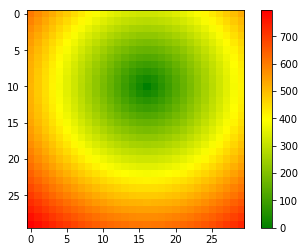

In [34]:
grid_plot(tile_distances_from_player)

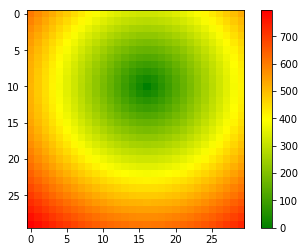

In [35]:
grid_plot(dist)

Let's find positions with-in 3 tile distances, thinking about maximum render distance.

In [36]:
%timeit tile_distances_from_player <= tile_center * 10

The slowest run took 21.01 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 1.14 µs per loop


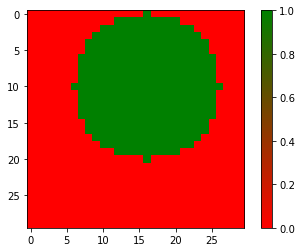

In [37]:
nearby_tile_distance = tile_distances_from_player <= tile_center * 10
# as true will be taken as 1 and false for 0
grid_plot(nearby_tile_distance, ["red", "green"])

and this is how we get the distance of the tiles

# Angles

Now to calculate the theta for the tiles

In [58]:
def np_theta(x, y, player_angle = 0):
    return player_angle - np.degrees(np.arctan2(y ,x) % (2 * np.pi))

In [39]:
%timeit np_theta(x_pos, y_pos)

10000 loops, best of 3: 30.2 µs per loop


In [40]:
theta = np_theta(x_pos, y_pos)
theta

array([ 212.00538321,  213.69006753,  215.53767779,  217.56859203,
        219.80557109,  222.27368901,  225.        ,  228.0127875 ,
        231.34019175,  235.0079798 ,  239.03624347,  243.43494882,
        248.19859051,  253.30075577,  258.69006753,  264.28940686,
        270.        ,  275.71059314,  281.30993247,  286.69924423,
        291.80140949,  296.56505118,  300.96375653,  304.9920202 ,
        308.65980825,  311.9872125 ,  315.        ,  317.72631099,
        320.19442891,  322.43140797,  209.35775354,  210.96375653,
        212.73522627,  214.69515353,  216.86989765,  219.28940686,
        221.9872125 ,  225.        ,  228.36646066,  232.12501635,
        236.30993247,  240.9453959 ,  246.03751103,  251.56505118,
        257.47119229,  263.65980825,  270.        ,  276.34019175,
        282.52880771,  288.43494882,  293.96248897,  299.0546041 ,
        303.69006753,  307.87498365,  311.63353934,  315.        ,
        318.0127875 ,  320.71059314,  323.13010235,  325.30484

In [41]:
theta[41]

240.94539590092285

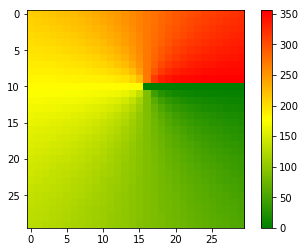

In [42]:
grid_plot(theta)

# Combine Distance with FOV

So if we combine the notion of distance and a limited field of view of 60 degrees

lets make it interesting and move the camera

In [59]:
theta = np_theta(x_pos, y_pos, 67)

In [60]:
np.where(theta > 360)

(array([], dtype=int64),)

In [61]:
np.where(theta < 0)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

In [62]:
theta[np.where(theta < 0)] += 360

In [63]:
np.where(theta < 0)

(array([], dtype=int64),)

In [64]:
%timeit np.logical_and(np.logical_or(theta > 330, theta < 30), tile_distances_from_player <= tile_center * 10)

The slowest run took 10.56 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 5.94 µs per loop


In [65]:
fov = np.logical_and(np.logical_or(theta > 330, theta < 30), tile_distances_from_player <= tile_center * 10)
fov

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
      

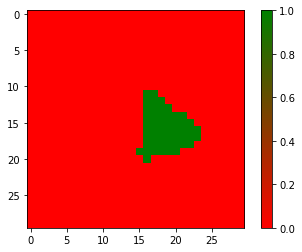

In [67]:
# as true will be taken as 1 and false for 0
grid_plot(fov, ["red", "green"])

In [46]:
%timeit np.where(fov)

The slowest run took 556.23 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 3.35 µs per loop


In [47]:
rendered_tiles = np.where(fov)[1]
rendered_tiles

array([203, 204, 205, 232, 233, 234, 235, 260, 261, 262, 263, 264, 265,
       288, 289, 290, 291, 292, 293, 294, 295, 316, 317, 318, 319, 320,
       321, 322, 323, 324, 325, 326, 348, 349, 350, 351, 352, 353, 354,
       355, 380, 381, 382, 383, 384, 385, 412, 413, 414, 415, 443, 444, 445], dtype=int64)

In [48]:
flat_pixel_positions[rendered_tiles]

array([[ 224.,  768.],
       [ 224.,  800.],
       [ 224.,  832.],
       [ 256.,  736.],
       [ 256.,  768.],
       [ 256.,  800.],
       [ 256.,  832.],
       [ 288.,  672.],
       [ 288.,  704.],
       [ 288.,  736.],
       [ 288.,  768.],
       [ 288.,  800.],
       [ 288.,  832.],
       [ 320.,  608.],
       [ 320.,  640.],
       [ 320.,  672.],
       [ 320.,  704.],
       [ 320.,  736.],
       [ 320.,  768.],
       [ 320.,  800.],
       [ 320.,  832.],
       [ 352.,  544.],
       [ 352.,  576.],
       [ 352.,  608.],
       [ 352.,  640.],
       [ 352.,  672.],
       [ 352.,  704.],
       [ 352.,  736.],
       [ 352.,  768.],
       [ 352.,  800.],
       [ 352.,  832.],
       [ 352.,  864.],
       [ 384.,  608.],
       [ 384.,  640.],
       [ 384.,  672.],
       [ 384.,  704.],
       [ 384.,  736.],
       [ 384.,  768.],
       [ 384.,  800.],
       [ 384.,  832.],
       [ 416.,  672.],
       [ 416.,  704.],
       [ 416.,  736.],
       [ 41